In [204]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [205]:
import numpy as np
import pandas as pd


In [206]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [207]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [208]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [209]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [210]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [211]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

In [212]:
measure_first_row = session.query(Measurement).first()
measure_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a0d6c10310>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

In [213]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2a0d6c10c70>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0}

# Exploratory Climate Analysis


 Design a query to retrieve the last 12 months of precipitation data and plot the results

 Calculate the date 1 year ago from the last data point in the database

 Perform a query to retrieve the date and precipitation scores

 Save the query results as a Pandas DataFrame and set the index to the date column
 
 Sort the dataframe by date

 Use Pandas Plotting with Matplotlib to plot the data


In [214]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [216]:
precip_yr = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date).order_by(Measurement.date).all()

In [217]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date", query_date)

Query Date 2016-08-23


In [218]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precip_last = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
df = pd.DataFrame(precip_last, columns=['prcp','date'])
#df.set_index('date')
df['prcp'] = df['prcp'].fillna(0)
df

prcp        date
0     0.08  2016-08-24
1     2.15  2016-08-24
2     2.28  2016-08-24
3     0.00  2016-08-24
4     1.22  2016-08-24
...    ...         ...
2218  0.50  2017-08-22
2219  0.00  2017-08-23
2220  0.00  2017-08-23
2221  0.08  2017-08-23
2222  0.45  2017-08-23

[2223 rows x 2 columns]

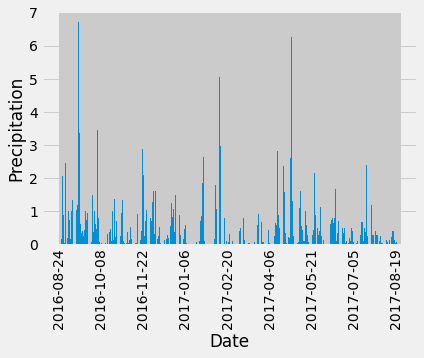

In [219]:
# Use Pandas Plotting with Matplotlib to plot the data

x = df['date']
y= df['prcp']
fig, ax = plt.subplots()
plt.bar(x,y)
every_nth = 45
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.xlabel('Date')
plt.xticks(rotation='vertical')
plt.ylabel('Precipitation')
plt.show()

In [220]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

prcp
count  2223.000000
mean      0.159951
std       0.441220
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       6.700000

In [237]:
# Design a query to show how many stations are available in this dataset
session.query(Measurement).group_by(Measurement.station).count()


9

In [246]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement)


measurement.station


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?



In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



## Bonus Challenge Assignment

In [226]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [227]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
session.close()